In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/uefa-euro-2024-players/euro2024_players.csv")
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [3]:
total_number_of_players = df.shape[0]
print("Total number of players in Euro 2024:",total_number_of_players)

Total number of players in Euro 2024: 623


In [4]:
#Checking for null values
rows_having_null_values = df[df.isnull().any(axis=1)]
print(rows_having_null_values)

                  Name        Position  Age               Club  Height Foot  \
390  Maximilian Entrup  Centre-Forward   26       TSV Hartberg     186  NaN   
418    Thomas Kaminski      Goalkeeper   31         Luton Town     190  NaN   
472   Bogdan Racovițan     Centre-Back   24  Raków Częstochowa     187  NaN   

     Caps  Goals  MarketValue  Country  
390     2      1      2000000  Austria  
418     1      0      3000000  Belgium  
472     2      0      1800000  Romania  


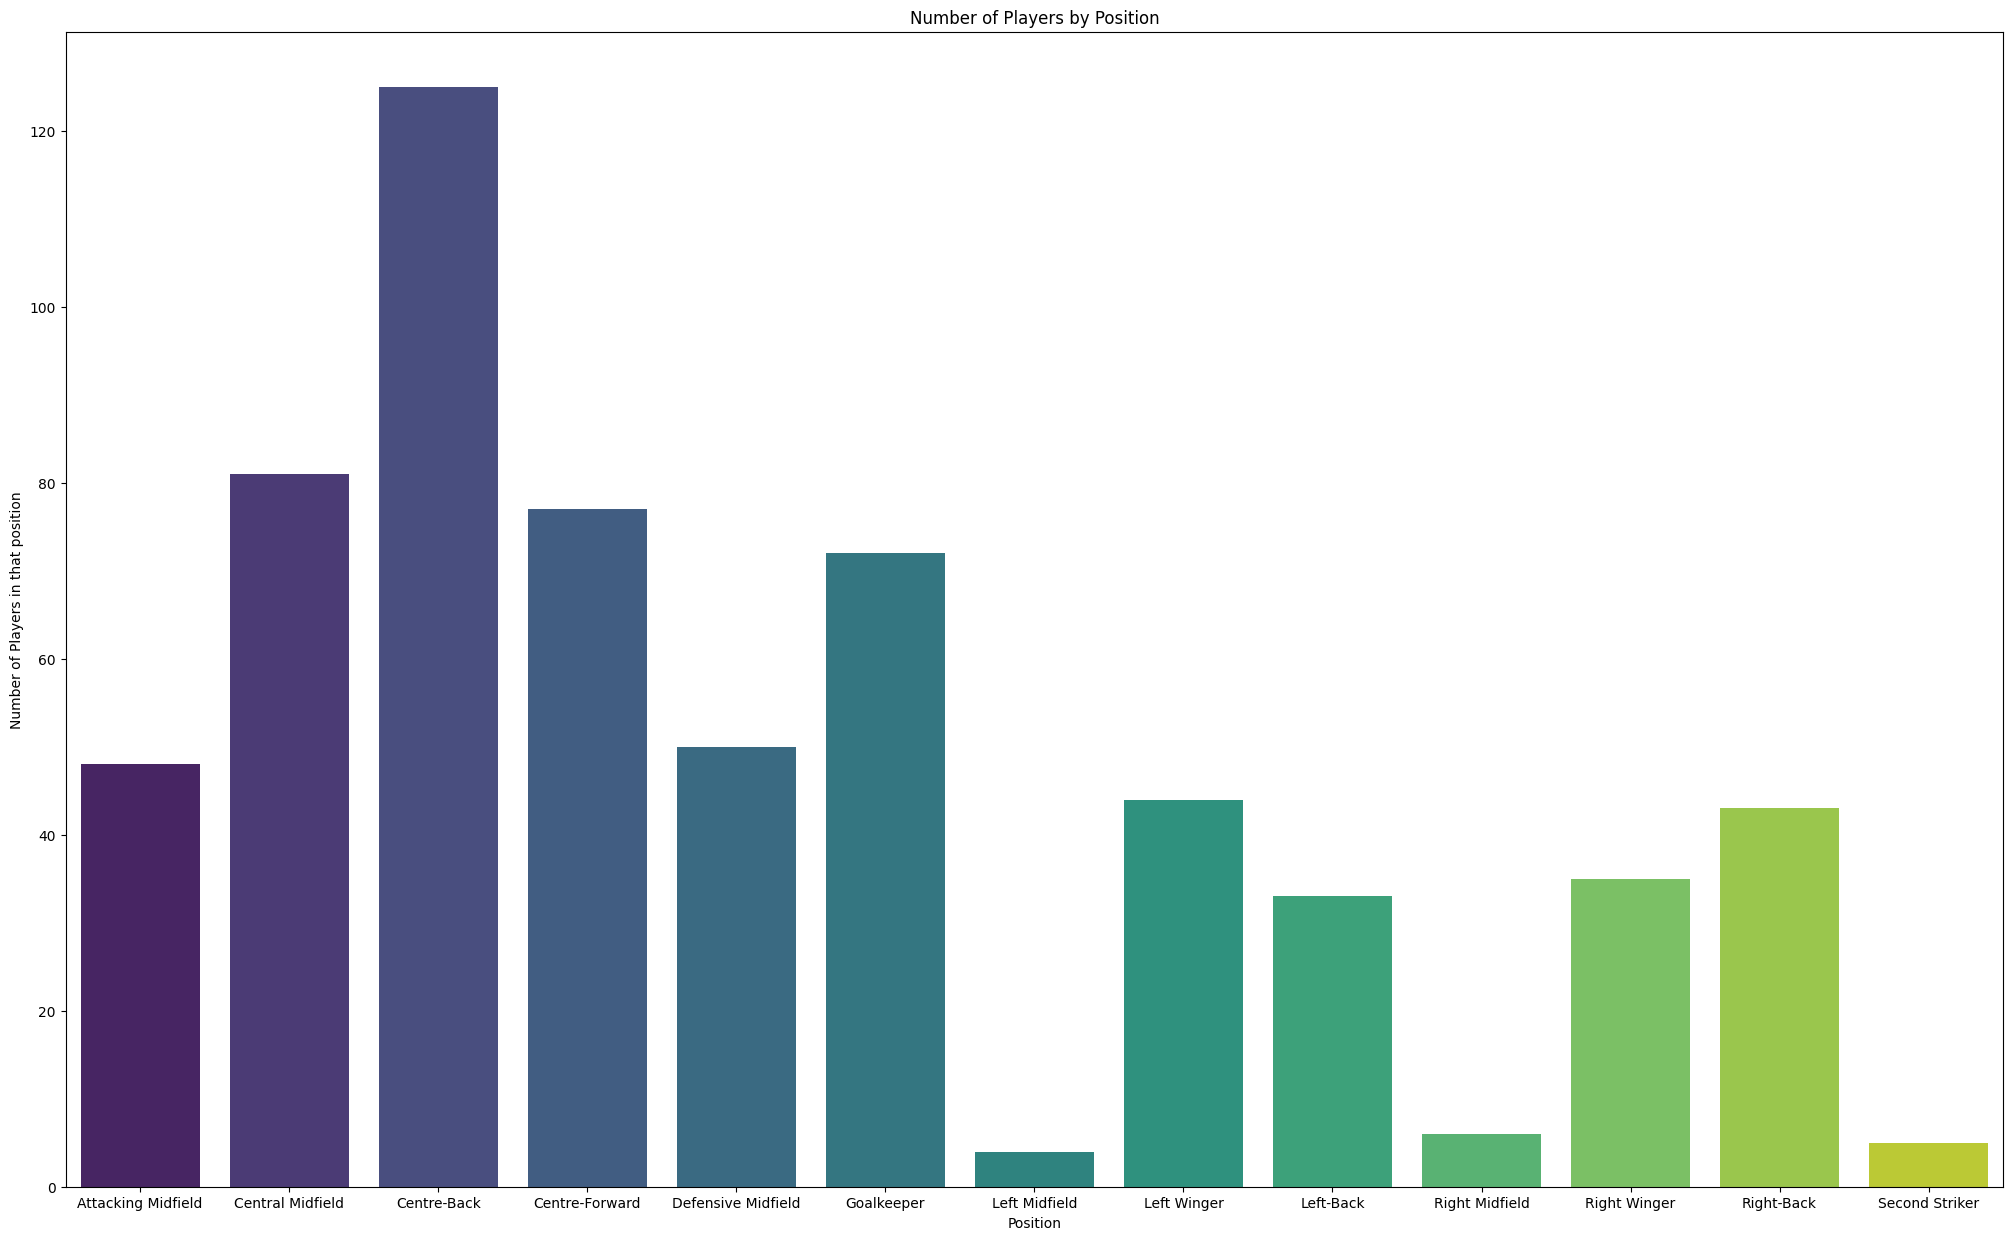

In [5]:
players_grouped_by_positions = df.groupby("Position").size().reset_index(name="Count")
plt.figure(figsize=(25,15))
sns.barplot(x='Position', y='Count', data=players_grouped_by_positions, palette='viridis')
plt.xlabel('Position')
plt.ylabel('Number of Players in that position')
plt.title('Number of Players by Position')
plt.show()

In [6]:
#Top 10 goalscorers
top_10_goalscorers = df.loc[df["Goals"].nlargest(10).index]
top_10_goalscorers

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
596,Cristiano Ronaldo,Centre-Forward,39,Al-Nassr FC,188,right,206,128,15000000,Portugal
440,Romelu Lukaku,Centre-Forward,31,AS Roma,191,left,114,83,30000000,Belgium
335,Robert Lewandowski,Centre-Forward,35,FC Barcelona,185,right,149,82,15000000,Poland
257,Harry Kane,Centre-Forward,30,Bayern Munich,188,right,91,63,100000000,England
309,Aleksandar Mitrovic,Centre-Forward,29,Al-Hilal SFC,189,right,90,57,28000000,Serbia
415,Olivier Giroud,Centre-Forward,37,AC Milan,192,left,132,57,3000000,France
411,Kylian Mbappé,Centre-Forward,25,Paris Saint-Germain,178,right,78,47,180000000,France
515,Andriy Yarmolenko,Right Winger,34,Dynamo Kyiv,189,left,118,46,2000000,Ukraine
22,Thomas Müller,Second Striker,34,Bayern Munich,185,right,129,45,8000000,Germany
363,Memphis Depay,Centre-Forward,30,Atlético de Madrid,178,right,91,45,10000000,Netherlands


In [7]:
#Top 10 valuable players
top_10_valuable_players = df.loc[df["MarketValue"].nlargest(10).index]
top_10_valuable_players

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
250,Jude Bellingham,Attacking Midfield,20,Real Madrid,186,right,29,3,180000000,England
411,Kylian Mbappé,Centre-Forward,25,Paris Saint-Germain,178,right,78,47,180000000,France
254,Phil Foden,Right Winger,24,Manchester City,171,left,34,4,150000000,England
255,Bukayo Saka,Right Winger,22,Arsenal FC,178,left,33,11,140000000,England
17,Florian Wirtz,Attacking Midfield,21,Bayer 04 Leverkusen,177,right,18,1,130000000,Germany
18,Jamal Musiala,Attacking Midfield,21,Bayern Munich,184,right,29,2,120000000,Germany
115,Rodri,Defensive Midfield,27,Manchester City,191,right,49,3,120000000,Spain
246,Declan Rice,Defensive Midfield,25,Arsenal FC,188,right,51,3,120000000,England
257,Harry Kane,Centre-Forward,30,Bayern Munich,188,right,91,63,100000000,England
402,Aurélien Tchouaméni,Defensive Midfield,24,Real Madrid,188,right,31,3,100000000,France


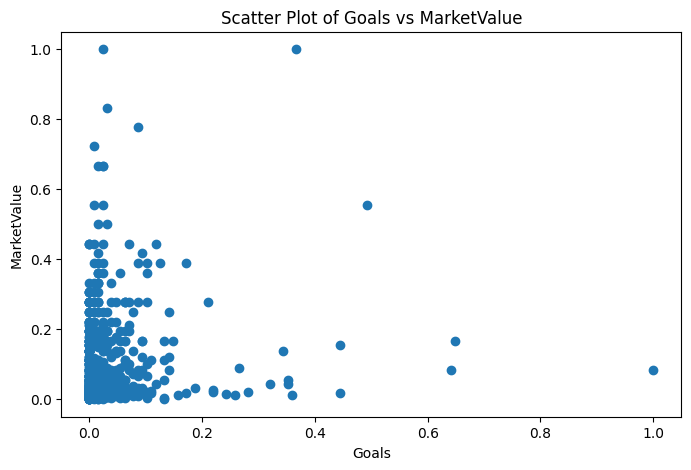

Correlation coefficient between Goals and Market Value is: 0.10731521528919245


In [8]:
#Correlation between goals scored and market value of a player
X = np.array(df["Goals"])
Y = np.array(df["MarketValue"])

X_normalized = (X - np.min(X)) / (np.max(X) - np.min(X))
Y_normalized = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))


plt.figure(figsize=(8, 5))
plt.scatter(X_normalized, Y_normalized)
plt.xlabel('Goals')
plt.ylabel('MarketValue')
plt.title('Scatter Plot of Goals vs MarketValue')
plt.show()

correlation_matrix = np.corrcoef(X_normalized, Y_normalized)

print("Correlation coefficient between Goals and Market Value is:",correlation_matrix[0,1])

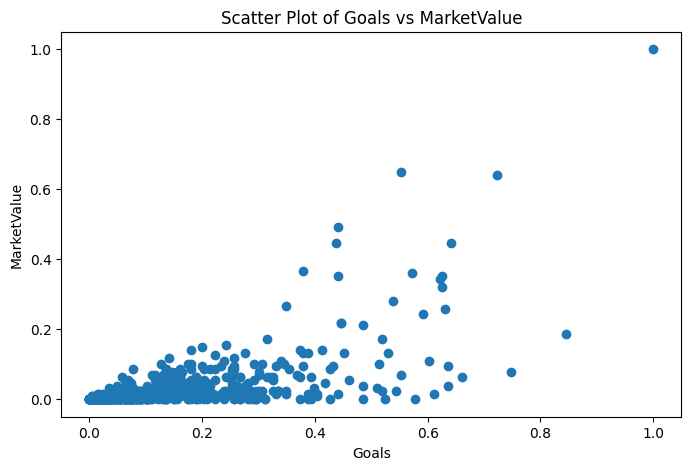

Correlation coefficient between Goals and Market Value is: 0.6361804686083812


In [9]:
#Correlation between goals scored and caps of a player
X = np.array(df["Caps"])
Y = np.array(df["Goals"])

X_normalized = (X - np.min(X)) / (np.max(X) - np.min(X))
Y_normalized = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))


plt.figure(figsize=(8, 5))
plt.scatter(X_normalized, Y_normalized)
plt.xlabel('Goals')
plt.ylabel('MarketValue')
plt.title('Scatter Plot of Goals vs MarketValue')
plt.show()

correlation_matrix = np.corrcoef(X_normalized, Y_normalized)

print("Correlation coefficient between Goals and Market Value is:",correlation_matrix[0,1])

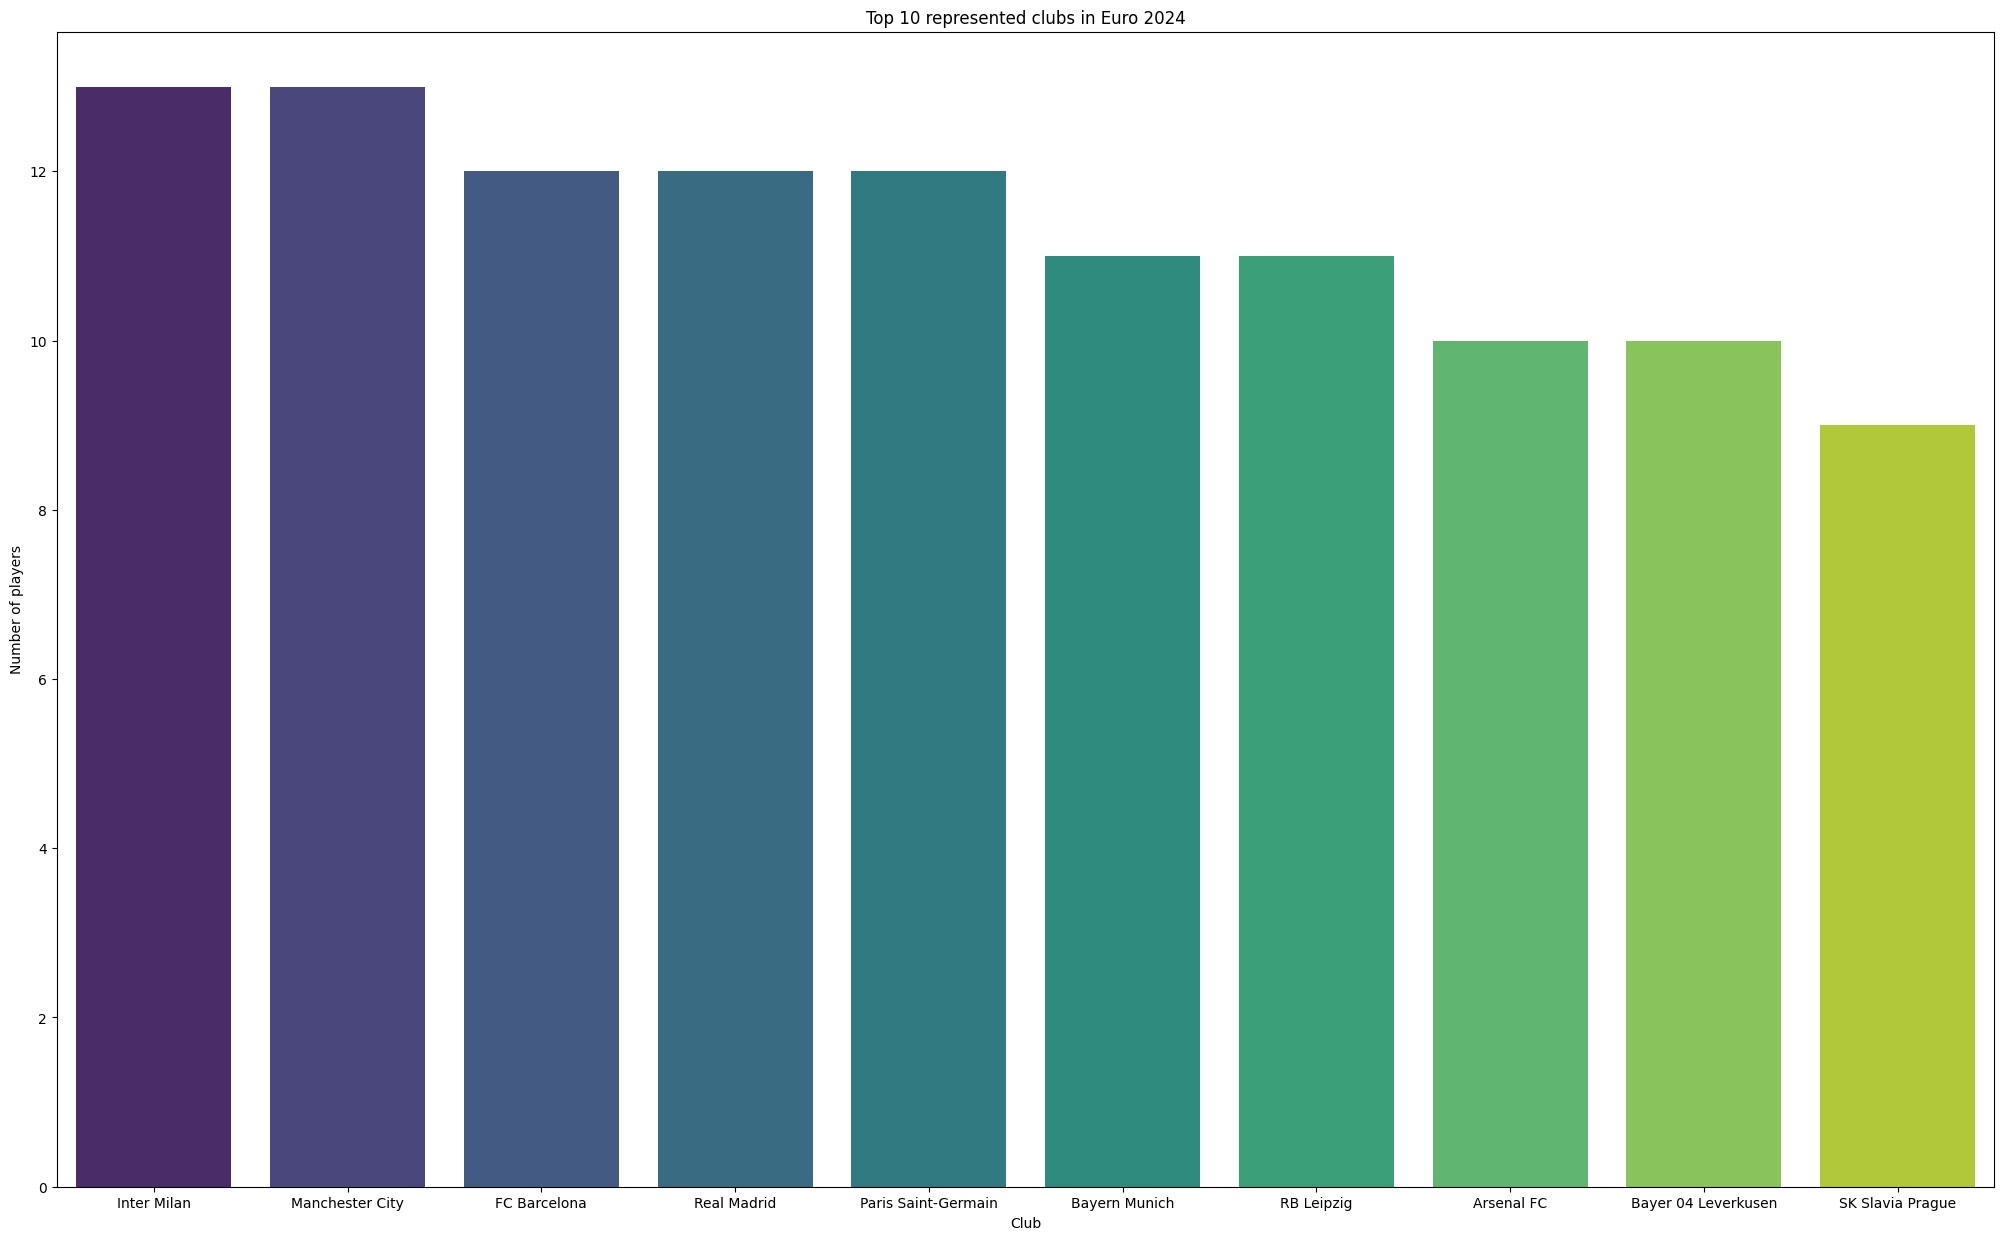

In [10]:
#Top 10 represented clubs in Euro 2024
top10_clubs_to_number_of_players = df.groupby("Club").size().sort_values(ascending=False)[:10]

df_club_to_number_of_players = pd.DataFrame({"Club": top10_clubs_to_number_of_players.index, 
                        "Number of players": top10_clubs_to_number_of_players.values})

plt.figure(figsize=(25,15))
sns.barplot(x='Club', y='Number of players', data=df_club_to_number_of_players, palette='viridis')
plt.xlabel('Club')
plt.ylabel('Number of players')
plt.title('Top 10 represented clubs in Euro 2024')
plt.show()